In [1]:
import stackstac
import satsearch
from datetime import datetime
import dask.diagnostics

import rioxarray
import xarray as xr
import numpy as np
import geopandas as gpd
import geojson
import json

from datetime import datetime

from shapely.geometry import mapping

import zarr

In [6]:
bbox = [150.53718391857018, -34.47320307771639, 151.25748275818813,  -33.82982205634835]                        

In [4]:
import os
%env AWS_NO_SIGN_REQUEST=Yes

t0 = datetime.now()
stac_found = satsearch.Search(
    url="https://explorer.sandbox.dea.ga.gov.au/stac/",
    bbox=bbox,
    collections=["s1_gamma0_geotif_scene"],
    datetime="2000-02-01/2021-03-31",
).found()  
print(stac_found)

stac_items = satsearch.Search(
    url="https://explorer.sandbox.dea.ga.gov.au/stac/",
    bbox=bbox,
    collections=["s1_gamma0_geotif_scene"],
    datetime="2000-02-01/2021-03-31",
).items()

print('searching time: {}'.format(datetime.now()-t0))

print("Num of Items", len(stac_items))

t0 = datetime.now()
stack = stackstac.stack(stac_items, epsg=6933, resolution=20480, resampling=1)

print('lazy stacking time: {}'.format(datetime.now()-t0))

print("Stack Size in GB: ", round(stack.nbytes/1e9,0))

stack


env: AWS_NO_SIGN_REQUEST=Yes
142
searching time: 0:00:01.935917
Num of Items 142
lazy stacking time: 0:00:00.158165
Stack Size in GB:  0.0


,Array,Chunk
Bytes,2.82 MB,9.92 kB
Shape,"(142, 2, 31, 40)","(1, 1, 31, 40)"
Count,853 Tasks,284 Chunks
Type,float64,numpy.ndarray


(array([2289.,   62.,   27.,    8.,   26.,   25.,   17.,   13.,    8.,
           5.]),
 array([0.        , 0.01287158, 0.02574315, 0.03861473, 0.0514863 ,
        0.06435788, 0.07722945, 0.09010103, 0.1029726 , 0.11584418,
        0.12871575]),
 <BarContainer object of 10 artists>)

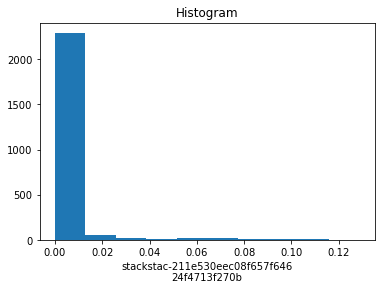

In [5]:
stack.where(stack['time']==1483298616446879000).plot()

In [7]:
stack[0]

<xarray.DataArray 'stackstac-211e530eec08f657f64624f4713f270b' (band: 2, y: 31, x: 40)>
dask.array<getitem, shape=(2, 31, 40), dtype=float64, chunksize=(1, 31, 40), chunktype=numpy.ndarray>
Coordinates:
    time                  datetime64[ns] 2017-01-01T19:23:36.446879
    id                    <U36 'dd98a265-b605-453d-95a1-48e47506512b'
  * band                  (band) <U2 'vh' 'vv'
  * x                     (x) float64 1.414e+07 1.416e+07 ... 1.494e+07
  * y                     (y) float64 -3.799e+06 -3.82e+06 ... -4.413e+06
    platform              <U10 'sentinel-1'
    title                 <U67 'S1A_IW_GRDH_1SDV_20170101T192323_20170101T192...
    created               <U32 '2019-01-22T20:58:31.315000+00:00'
    odc:product           <U22 's1_gamma0_geotif_scene'
    cubedash:region_code  object None
    proj:epsg             int32 4326
    instruments           <U3 'sar'
Attributes:
    spec:        RasterSpec(epsg=6933, bounds=(14131200, -4444160, 14950400, ...
    crs:         epsg:6933
    transform:   | 20480.00, 0.00, 14131200.00|\n| 0.00,-20480.00,-3809280.00...
    resolution:  20480

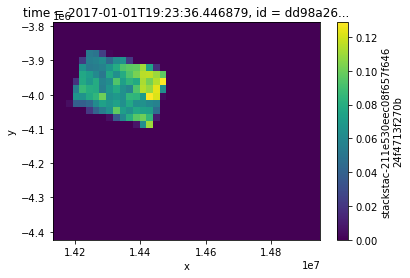

In [11]:
stack.sel(band='vv')[0].plot()

In [ ]:
stack.sel(band='vv').plot()